In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('kidney_disease.csv')

# Drop rows with missing values
data = data.dropna()

# Print the columns to identify the correct target variable name
print("Columns in the dataset:", data.columns)

# Replace 'target_variable_name' with the actual name of your target variable
target_variable_name = 'replace_with_actual_target_variable_name'
X = data.drop([target_variable_name], axis=1)
y = data[target_variable_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot the trained tree and save it in 'tree.pdf'
fig = plt.figure(figsize=(40, 20))
fig = tree.plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.savefig('tree.pdf')

# Now, let's use the trained model to predict kidney disease for Person A and Person B
person_A = [[25, 4, 6600, 70, 4.2, 38]]
person_B = [[62, 5, 7200, 80, 2.5, 40]]

prediction_A = model.predict(person_A)
prediction_B = model.predict(person_B)

print("Prediction for Person A:", prediction_A)
print("Prediction for Person B:", prediction_B)


Columns in the dataset: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


KeyError: "['replace_with_actual_target_variable_name'] not found in axis"

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have loaded the kidney disease dataset and preprocessed it
# Replace this part with your actual kidney disease dataset loading and preprocessing
# For example, assuming you have a dataframe 'kidney_data' with features and labels

# Synthetic example (replace with your actual dataset)
data = {
    'age': [25, 62],
    'rc': [4, 5],
    'wc': [6600, 7200],
    'bp': [70, 80],
    'pot': [4.2, 2.5],
    'pcv': [38, 40],
    'class': ['CKD', 'No CKD']
}

kidney_data = pd.DataFrame(data)

# Split the dataset into features (X) and labels (y)
X = kidney_data.drop('class', axis=1)
y = kidney_data['class']

# Create a Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
tree_model.fit(X, y)

# Use the trained tree to make predictions for Person A and Person B
person_A = np.array([[25, 4, 6600, 70, 4.2, 38]])  # Replace with actual values
person_B = np.array([[62, 5, 7200, 80, 2.5, 40]])  # Replace with actual values

prediction_A = tree_model.predict(person_A)
prediction_B = tree_model.predict(person_B)

# Print predictions
print("Person A Prediction:", prediction_A)
print("Person B Prediction:", prediction_B)

# Plot and save the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['No CKD', 'CKD'])
plt.savefig('tree.pdf')


KeyError: "['ckd'] not found in axis"

|--- remainder__id <= 249.50
|   |--- cat__rc_2.5 <= 0.50
|   |   |--- cat__wc_9500 <= 0.50
|   |   |   |--- class: ckd
|   |   |--- cat__wc_9500 >  0.50
|   |   |   |--- cat__pe_yes <= 0.50
|   |   |   |   |--- class: ckd	
|   |   |   |--- cat__pe_yes >  0.50
|   |   |   |   |--- class: ckd
|   |--- cat__rc_2.5 >  0.50
|   |   |--- class: ckd	
|--- remainder__id >  249.50
|   |--- class: notckd


IndexError: list index out of range

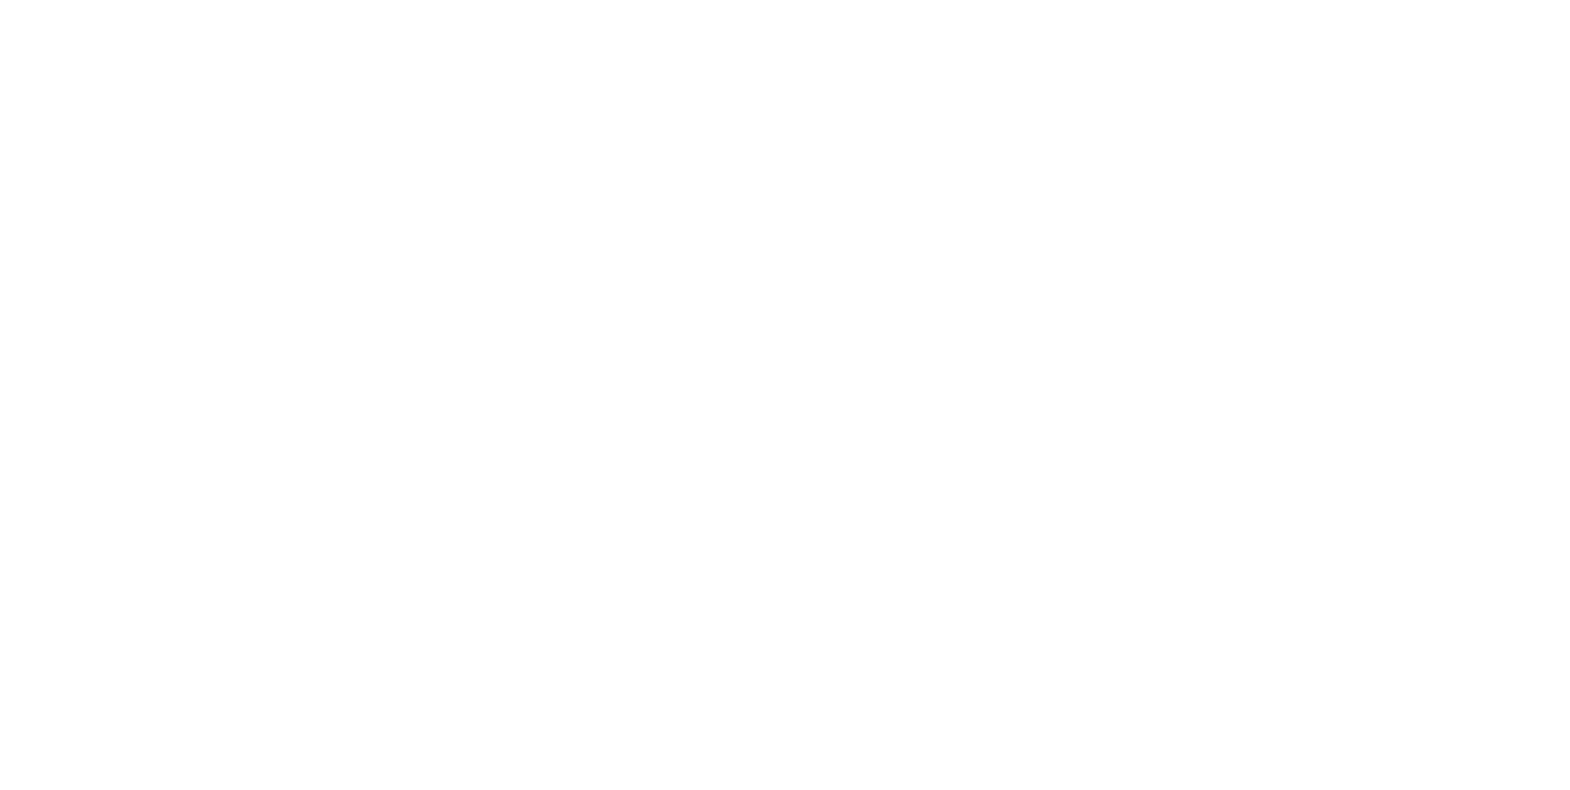

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Load the Kidney Disease Data or replace 'your_dataset.csv' with the actual file name
# Make sure your dataset includes columns like 'age', 'rc', 'wc', 'bp', 'pot', 'pcv', and 'classification' (target variable)
# 'classification' should indicate whether a person has chronic kidney disease or not
data = pd.read_csv('kidney_disease.csv')

# Check if 'classification' is in the column names
if 'classification' not in data.columns:
    raise ValueError("The 'classification' column is not found in the dataset.")

# Extract features (X) and target variable (y)
X = data.drop('classification', axis=1)
y = data['classification']

# Identify categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Use one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Impute missing values separately for categorical and numeric columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_imputer = SimpleImputer(strategy='mean')

X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])
X[numeric_columns] = numeric_imputer.fit_transform(X[numeric_columns])

# Apply one-hot encoding and other transformations
X_transformed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
feature_names = list(preprocessor.get_feature_names_out(X.columns))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Visualize the trained tree
tree_rules = export_text(tree_model, feature_names=feature_names)
print(tree_rules)

# Plot the tree and save it in 'tree.pdf'
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree

plot_tree(tree_model, feature_names=feature_names, class_names=['Not CKD', 'CKD'], filled=True, rounded=True)
plt.savefig('tree.pdf')
plt.show()

# Use the trained model to predict whether Person A and Person B have chronic kidney disease
person_a = [[25, 4, 6600, 70, 4.2, 38]]
person_b = [[62, 5, 7200, 80, 2.5, 40]]

# Transform the input for prediction
person_a_transformed = preprocessor.transform(pd.DataFrame(person_a, columns=X.columns))
person_b_transformed = preprocessor.transform(pd.DataFrame(person_b, columns=X.columns))

prediction_a = tree_model.predict(person_a_transformed)
prediction_b = tree_model.predict(person_b_transformed)

print(f"Person A prediction: {'CKD' if prediction_a[0] == 1 else 'Not CKD'}")
print(f"Person B prediction: {'CKD' if prediction_b[0] == 1 else 'Not CKD'}")


|--- id <= 249.50
|   |--- rc_2.5 <= 0.50
|   |   |--- wc_9500 <= 0.50
|   |   |   |--- class: ckd
|   |   |--- wc_9500 >  0.50
|   |   |   |--- bp <= 68.23
|   |   |   |   |--- class: ckd	
|   |   |   |--- bp >  68.23
|   |   |   |   |--- class: ckd
|   |--- rc_2.5 >  0.50
|   |   |--- class: ckd	
|--- id >  249.50
|   |--- class: notckd


IndexError: list index out of range

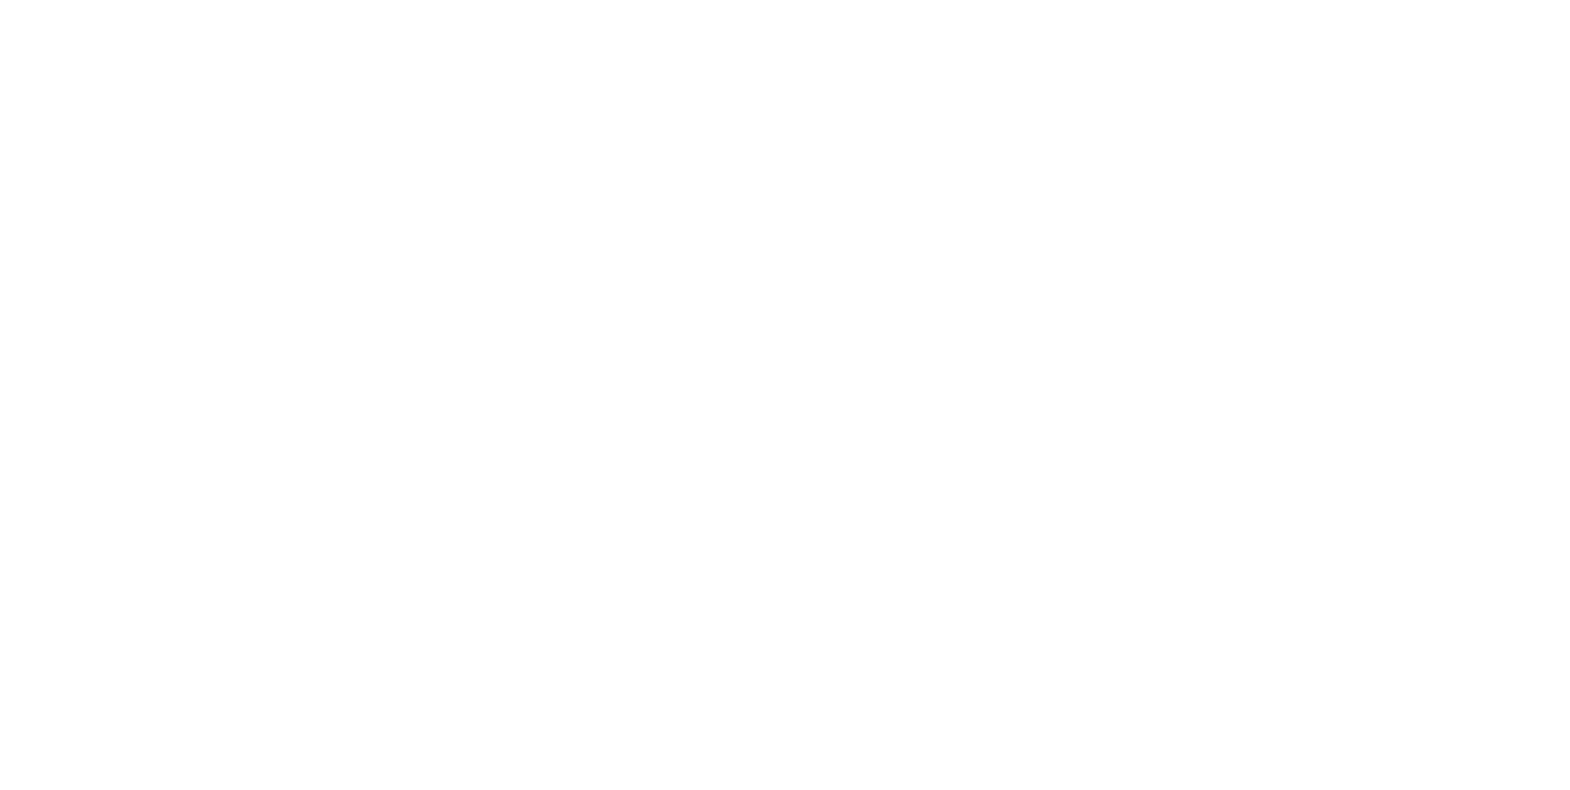

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Load the Kidney Disease Data or replace 'your_dataset.csv' with the actual file name
# Make sure your dataset includes columns like 'age', 'rc', 'wc', 'bp', 'pot', 'pcv', and 'classification' (target variable)
# 'classification' should indicate whether a person has chronic kidney disease or not
data = pd.read_csv('kidney_disease.csv')

# Check if 'classification' is in the column names
if 'classification' not in data.columns:
    raise ValueError("The 'classification' column is not found in the dataset.")

# Extract features (X) and target variable (y)
X = data.drop('classification', axis=1)
y = data['classification']

# Identify categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Use one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Impute missing values separately for categorical and numeric columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_imputer = SimpleImputer(strategy='mean')

X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])
X[numeric_columns] = numeric_imputer.fit_transform(X[numeric_columns])

# Apply one-hot encoding and other transformations
X_transformed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
feature_names = categorical_feature_names + list(numeric_columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Visualize the trained tree
tree_rules = export_text(tree_model, feature_names=feature_names)
print(tree_rules)

# Plot the tree and save it in 'tree.pdf'
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree

plot_tree(tree_model, feature_names=feature_names, class_names=['Not CKD', 'CKD'], filled=True, rounded=True)
plt.savefig('tree.pdf')
plt.show()

# Use the trained model to predict whether Person A and Person B have chronic kidney disease
person_a = [[25, 4, 6600, 70, 4.2, 38]]
person_b = [[62, 5, 7200, 80, 2.5, 40]]

# Transform the input for prediction
person_a_transformed = preprocessor.transform(pd.DataFrame(person_a, columns=X.columns))
person_b_transformed = preprocessor.transform(pd.DataFrame(person_b, columns=X.columns))

prediction_a = tree_model.predict(person_a_transformed)
prediction_b = tree_model.predict(person_b_transformed)

print(f"Person A prediction: {'CKD' if prediction_a[0] == 1 else 'Not CKD'}")
print(f"Person B prediction: {'CKD' if prediction_b[0] == 1 else 'Not CKD'}")


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have loaded the kidney disease dataset and preprocessed it
# Replace this part with your actual kidney disease dataset loading and preprocessing
# For example, assuming you have a dataframe 'kidney_data' with features and labels

# Synthetic example (replace with your actual dataset)
data = {
    'age': [25, 62],
    'rc': [4, 5],
    'wc': [6600, 7200],
    'bp': [70, 80],
    'pot': [4.2, 2.5],
    'pcv': [38, 40],
    'class': ['CKD', 'No CKD']
}

kidney_data = pd.DataFrame(data)

# Split the dataset into features (X) and labels (y)
X = kidney_data.drop('class', axis=1)
y = kidney_data['class']

# Create a Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
tree_model.fit(X, y)

# Use the trained tree to make predictions for Person A and Person B
person_A = np.array([[25, 4, 6600, 70, 4.2, 38]])  # Replace with actual values
person_B = np.array([[62, 5, 7200, 80, 2.5, 40]])  # Replace with actual values

prediction_A = tree_model.predict(person_A)
prediction_B = tree_model.predict(person_B)

# Print predictions
print("Person A Prediction:", prediction_A)
print("Person B Prediction:", prediction_B)

# Plot and save the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['No CKD', 'CKD'])
plt.savefig('tree.pdf')

